In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('./Hotel Reservations.csv')

In [3]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
sn.set_style('whitegrid')

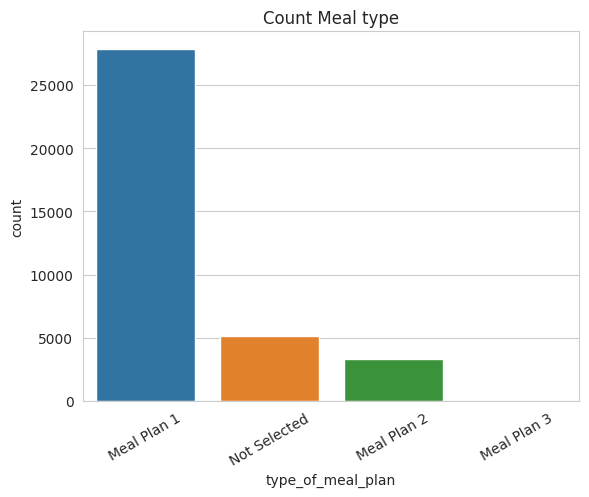

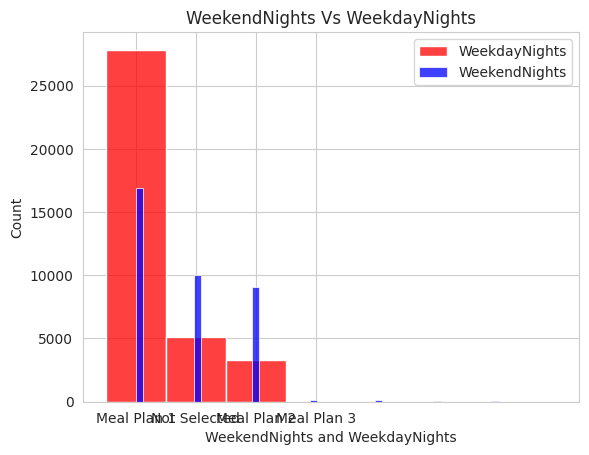

In [7]:
sn.countplot(data=df, x='type_of_meal_plan', hue='type_of_meal_plan', legend=False)
plt.title('Count Meal type')
plt.xticks(rotation=30)
plt.show()

sn.histplot(df['type_of_meal_plan'], color='red', label='WeekdayNights')
sn.histplot(df['no_of_weekend_nights'], color='blue', label='WeekendNights')
plt.title('WeekendNights Vs WeekdayNights')
plt.xlabel('WeekendNights and WeekdayNights')
plt.legend()
plt.show()

In [8]:
df = df.drop(columns=['Booking_ID', 'arrival_year'])

In [9]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,4,21,Online,0,0,0,94.50,0,Canceled


In [11]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

y = df['booking_status']
X = df['no_of_adults',	'no_of_children',	'no_of_weekend_nights',	no_of_week_nights	type_of_meal_plan	required_car_parking_space	room_type_reserved	lead_time	arrival_month	arrival_date	market_segment_type	repeated_guest	no_of_previous_cancellations	no_of_previous_bookings_not_canceled	avg_price_per_room	no_of_special_requests	]

In [12]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,8,3,Online,0,0,0,167.80,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,10,17,Online,0,0,0,90.95,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,7,1,Online,0,0,0,98.39,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,4,21,Online,0,0,0,94.50,0


In [13]:
y

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
36274    Not_Canceled
Name: booking_status, Length: 36275, dtype: object

In [24]:
ct = ColumnTransformer(transformers=[('one_hot_1', OneHotEncoder(), ['type_of_meal_plan']),
                                     ('one_hot_2', OneHotEncoder(), ['room_type_reserved']),
                                       ('one_hot_3', OneHotEncoder(), ['market_segment_type'])],
                                          remainder='passthrough'
                                    )

In [25]:
X = ct.fit_transform(X)

In [26]:
X

array([[  1.  ,   0.  ,   0.  , ...,   0.  ,  65.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  , 106.68,   1.  ],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  60.  ,   0.  ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  98.39,   2.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,  94.5 ,   0.  ],
       [  1.  ,   0.  ,   0.  , ...,   0.  , 161.67,   0.  ]])

In [27]:
X = pd.DataFrame(X, columns=ct.get_feature_names_out())

In [28]:
X

,one_hot_1__type_of_meal_plan_Meal Plan 1,one_hot_1__type_of_meal_plan_Meal Plan 2,one_hot_1__type_of_meal_plan_Meal Plan 3,one_hot_1__type_of_meal_plan_Not Selected,one_hot_2__room_type_reserved_Room_Type 1,one_hot_2__room_type_reserved_Room_Type 2,one_hot_2__room_type_reserved_Room_Type 3,one_hot_2__room_type_reserved_Room_Type 4,one_hot_2__room_type_reserved_Room_Type 5,one_hot_2__room_type_reserved_Room_Type 6,one_hot_2__room_type_reserved_Room_Type 7,one_hot_3__market_segment_type_Aviation,one_hot_3__market_segment_type_Complementary,one_hot_3__market_segment_type_Corporate,one_hot_3__market_segment_type_Offline,one_hot_3__market_segment_type_Online,remainder__no_of_adults,remainder__no_of_children,remainder__no_of_weekend_nights,remainder__no_of_week_nights,remainder__required_car_parking_space,remainder__lead_time,remainder__arrival_month,remainder__arrival_date,remainder__repeated_guest,remainder__no_of_previous_cancellations,remainder__no_of_previous_bookings_not_canceled,remainder__avg_price_per_room,remainder__no_of_special_requests
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,224.0,10.0,2.0,0.0,0.0,0.0,65.00,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,3.0,0.0,5.0,11.0,6.0,0.0,0.0,0.0,106.68,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,28.0,0.0,0.0,0.0,60.00,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,211.0,5.0,20.0,0.0,0.0,0.0,100.00,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,48.0,4.0,11.0,0.0,0.0,0.0,94.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0,6.0,0.0,85.0,8.0,3.0,0.0,0.0,0.0,167.80,1.0
36271,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,3.0,0.0,228.0,10.0,17.0,0.0,0.0,0.0,90.95,2.0
36272,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,6.0,0.0,148.0,7.0,1.0,0.0,0.0,0.0,98.39,2.0
36273,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,63.0,4.0,21.0,0.0,0.0,0.0,94.50,0.0


In [29]:
label = LabelEncoder()

In [30]:
y = label.fit_transform(y)

In [31]:
y

array([1, 1, 0, ..., 1, 0, 1])

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
x_train

,one_hot_1__type_of_meal_plan_Meal Plan 1,one_hot_1__type_of_meal_plan_Meal Plan 2,one_hot_1__type_of_meal_plan_Meal Plan 3,one_hot_1__type_of_meal_plan_Not Selected,one_hot_2__room_type_reserved_Room_Type 1,one_hot_2__room_type_reserved_Room_Type 2,one_hot_2__room_type_reserved_Room_Type 3,one_hot_2__room_type_reserved_Room_Type 4,one_hot_2__room_type_reserved_Room_Type 5,one_hot_2__room_type_reserved_Room_Type 6,one_hot_2__room_type_reserved_Room_Type 7,one_hot_3__market_segment_type_Aviation,one_hot_3__market_segment_type_Complementary,one_hot_3__market_segment_type_Corporate,one_hot_3__market_segment_type_Offline,one_hot_3__market_segment_type_Online,remainder__no_of_adults,remainder__no_of_children,remainder__no_of_weekend_nights,remainder__no_of_week_nights,remainder__required_car_parking_space,remainder__lead_time,remainder__arrival_month,remainder__arrival_date,remainder__repeated_guest,remainder__no_of_previous_cancellations,remainder__no_of_previous_bookings_not_canceled,remainder__avg_price_per_room,remainder__no_of_special_requests
25629,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,26.0,10.0,17.0,0.0,0.0,0.0,161.00,0.0
14473,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,98.0,7.0,16.0,0.0,0.0,0.0,121.50,2.0
23720,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,0.0,433.0,9.0,8.0,0.0,0.0,0.0,70.00,0.0
5843,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,5.0,0.0,195.0,8.0,8.0,0.0,0.0,0.0,72.25,0.0
18709,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,188.0,6.0,15.0,0.0,0.0,0.0,130.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,43.0,12.0,26.0,0.0,0.0,0.0,55.00,2.0
6265,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,102.0,10.0,16.0,0.0,0.0,0.0,80.00,0.0
11284,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,5.0,5.0,24.0,0.0,0.0,0.0,110.00,1.0
860,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,213.0,6.0,7.0,0.0,0.0,0.0,130.00,0.0


In [34]:
scaler = StandardScaler()

In [35]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [36]:
x_train

array([[ 0.55033111, -0.31746684, -0.01174117, ..., -0.08703155,
         1.636392  , -0.78836368],
       [ 0.55033111, -0.31746684, -0.01174117, ..., -0.08703155,
         0.51222695,  1.75508423],
       [ 0.55033111, -0.31746684, -0.01174117, ..., -0.08703155,
        -0.95345661, -0.78836368],
       ...,
       [ 0.55033111, -0.31746684, -0.01174117, ..., -0.08703155,
         0.18493839,  0.48336028],
       [ 0.55033111, -0.31746684, -0.01174117, ..., -0.08703155,
         0.75413588, -0.78836368],
       [ 0.55033111, -0.31746684, -0.01174117, ..., -0.08703155,
         1.81284323, -0.78836368]])

In [43]:
# model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model = LogisticRegression()

In [44]:
model.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [46]:
cm = confusion_matrix(y_pred, y_test)

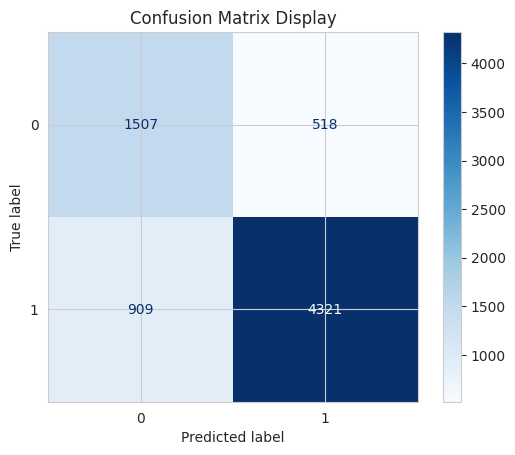

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

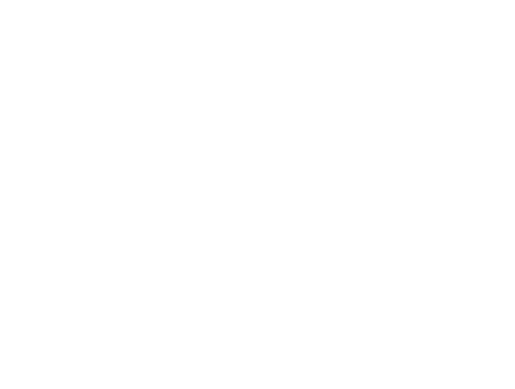

In [47]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot(cmap='Blues')
plt.title('Confusion Matrix Display')
plt.show()
plt.axis('off')